In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
dataset = pd.read_csv("loan.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [36]:
#lets remove outliers from Coapplicantincome

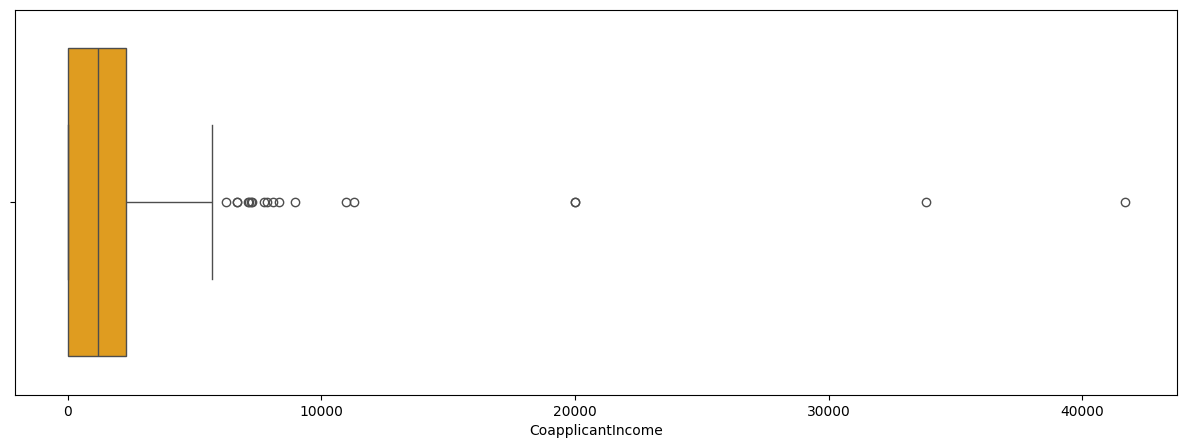

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(x="CoapplicantIncome",data=dataset,color="orange")
plt.show()

In [38]:
#for coapplicantincome:
q1 = dataset["CoapplicantIncome"].quantile(0.25) #25 percentile of coapplicantincome
q3 = dataset["CoapplicantIncome"].quantile(0.75) #75 percentile of coapplicantincome
q1,q3

(np.float64(0.0), np.float64(2297.25))

In [39]:
IQR = q3-q1
IQR

np.float64(2297.25)

In [40]:
#min and max range:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range,max_range

(np.float64(-3445.875), np.float64(5743.125))

In [41]:
#lets remove outliers from coapplicantincome
#before that the number of rows in orignal data are :
dataset.shape[0]

614

In [42]:
new_data = dataset[dataset["CoapplicantIncome"]<max_range]
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
#lets see the change in number of rows:
new_data.shape[0]

596

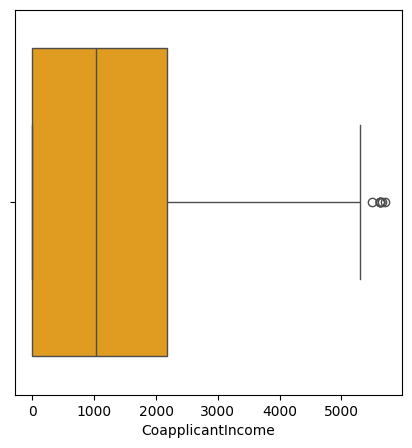

In [44]:
#hence we can see that the rows having outlier values have been deleted,
#lets see it in boxplot if there are any outliers now:
plt.figure(figsize=(5,5))
sns.boxplot(x="CoapplicantIncome",data=new_data,color="orange")
plt.show()

In [35]:
# we can see the outliers has be reduced to minimal